# Uber
My 2013 Macbook Pro with 8gb of memory wasn't really up to the task of running big joins and creating visuals for all of the data. I did initially ETL all of the CSV files into an Azure Data Warehouse instance, but I quickly ran out of free credits and so I am left with doing it all locally. In case you want to test this on your own, this is all inside Docker so you should be able to run this anywhere.

My strategy was basically to take the CSV files and store them in a geo-optimized PostgreSQL database called PostGIS. Querying based on spatial data is faster and easier with smart indices and K-D trees / other fancy algorithms that PostGIS runs than on a more simple SQL db (or just trying to load up the data into memory on my computer...)

I wrote a little python client for Jupyter where you can run some sql or see some visualizations.

In [14]:
import sys
from uber import taxidb
import matplotlib.pyplot as plt

In [15]:
db = taxidb()

In [16]:
db.get_average_trip_length()[0]

Decimal('650.6397363973639736')

As you can tell if you run this, these non-spatial queries run quite quickly because of the indices I added to the database.

In [38]:
# .2 miles = 321 meters.
meters, minutes = 321, 5
db.get_shareable_ride_count_by_distance_and_time(meters, minutes)

(9134095,)

On the other hand, doing spatial queries such as this one take a little longer, up to several minutes, because of hardware limitations.

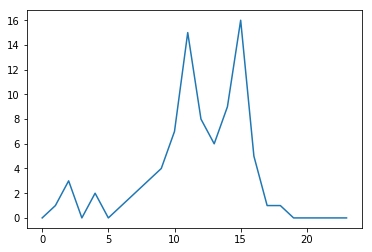

In [5]:
### Here, I iterate through the hours 0 - 23 and graph the percentage of rides that are shareable
### Distance must be < .2 miles and time must be < 5 minutes in this particular instance. 
### You can see there is a big peak in shareable rides around the work day, with spikes at rush hour.

hours = [db.get_shareable_ride_count_by_distance_and_time(distance, time, str(i)) for i in range(24)]
plt.plot(hours)

In [ ]:
# 1 miles = 610 meters
# 12 = 12pm. Let's see how ride share-ability varies with regards to 50 meter space increments at noon.
hours = [db.get_shareable_ride_count_by_distance_and_time(i, time, "12") for i in range(0, 610, 50)]
plt.plot(hours)

In [32]:
# Here, you can try something out: Use this sql, or write your own here:
query = """
            SELECT SUM(trip_time_in_secs) / COUNT(*) as time, Medallion
            FROM TRIPS
            GROUP BY Medallion
            ORDER BY time
            DESC
            LIMIT 10;
"""
result = db.executeQuery(query)
for r in result:
    print(r)

(4110, '75E1366924083F355F1E7C0E4F9264A6')
(3840, 'F1E34DD24CED47628004ACA45C5465F0')
(3480, '673FB8D38798B9F5B7D586F070919B1D')
(3360, 'B139B78DCD5CD9648BC8A10DA044370A')
(3180, 'E1F9101805F2A5507733615E225DCD0D')
(3048, '4689B9B86CAFF4CE3947C54503AE2672')
(2970, '19C1C996BDB680CF00408E087EDB3E6D')
(2730, 'F7B63A1A3E8CF3E6D276147F5BF712F2')
(2700, 'B960ACF4ED518A7B80304A186937F7DE')
(2640, 'FBA2287139675EA997D66B885C804BB5')


In [34]:
query = """
            SELECT avg(pickup_longitude), avg(pickup_latitude)
            FROM TRIPS
            Group BY pickup_datetime
"""
result = db.executeQuery(query)
for r in result:
    print(r)

(Decimal('-73.1742757252747253'), Decimal('40.2854996153846154'))
(Decimal('-73.1516720333333333'), Decimal('40.3043178000000000'))
(Decimal('-71.7546224450000000'), Decimal('39.5356331800000000'))
(Decimal('-73.9854066666666667'), Decimal('40.7500406666666667'))
(Decimal('-71.5091006111111111'), Decimal('39.3944984666666667'))
(Decimal('-73.9746101764705882'), Decimal('40.7502059803921569'))
(Decimal('-72.0232010000000000'), Decimal('39.6741078684210526'))
(Decimal('-73.3745552439024390'), Decimal('40.4249085121951220'))
(Decimal('-72.7925235957446809'), Decimal('40.1081264734042553'))
(Decimal('-73.8570940000000000'), Decimal('40.7272870000000000'))
(Decimal('-73.9885215000000000'), Decimal('40.7678485000000000'))
(Decimal('-73.9509933333333333'), Decimal('40.7370309666666667'))
(Decimal('-67.0484009062500000'), Decimal('36.9322791250000000'))
(Decimal('-73.2030973455497382'), Decimal('40.3230493560209424'))
(Decimal('-73.9768893636363636'), Decimal('40.7548923272727273'))
(Decimal('